In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from qutip import *
from numpy import linalg as LA


import math
from scipy.integrate import quad
from scipy.misc import derivative

Spin boson model solution (based on Gernot's Example: https://www1.itp.tu-berlin.de/schaller/download/TOQT.pdf page 136)

$ H_S= \frac{\omega}{2} \sigma_z + \frac{\Delta}{2} \sigma_x $

$ H_B= \sum_{k} \omega_k a_k ^{\dagger} a_k $

$ H_I= \sigma_z \otimes \sum t_{k}\left(a_{k}+a_{k}^{\dagger}\right)$

Exact solution:  pure-dephasing limit ($\Delta=0$)

$ H_S= \frac{\omega}{2} \sigma_z  $

$ H_B= \sum_{k} \omega_k a_k ^{\dagger} a_k $

$ H_I= \sigma_z \otimes \sum t_{k}\left(a_{k}+a_{k}^{\dagger}\right)$ 

The populatios remain unafected since $H_I$ conmustes with $H_S$, but the coherenes decay accroding to(in the interaction picture) : 

$\rho_{01}(t)=\exp \left\{-\frac{4}{\pi} \int_{0}^{\infty} J^{(0)}(\omega) \frac{\sin ^{2}(\omega t / 2)}{\omega^{2}} \operatorname{coth}\left(\frac{\beta \omega}{2}\right) d \omega\right\} \rho_{01}^{0}$


We will use this example for spectral densury 


$J^{(0)}(\omega)=2 \pi \sum_{k}\left|t_{k}\right|^{2} \delta\left(\omega-\omega_{k}\right)=\Gamma \frac{\omega \delta^{7}}{\left[(\omega-\epsilon)^{2}+\delta^{2}\right]^{2}\left[(\omega+\epsilon)^{2}+\delta^{2}\right]^{2}}$

with this paremeters:

$\mathbf{\Gamma} \beta=10000, \delta \beta=\mathbf{1}, \boldsymbol{\epsilon} \beta=2, \omega \beta=1$

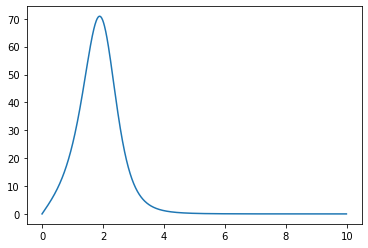

In [2]:
#set 1
beta= 1.0
Gamma=  10000.0/beta
delta= 1.0/beta
epsilon = 2.0 /beta 
omega=1.0/beta

#set 2
#beta= 1.0
#Gamma=  20/beta
#delta= 1.0/beta
#epsilon = 2.0 /beta 
#omega=10.0/beta


rho_01_init=0.5

def J(w):
    return Gamma * ((w * delta**7) /(((w-epsilon)**2+delta**2)**2 * ((w+epsilon)**2+delta**2)**2 ))

#print (J(0.0))
vecfunc = np.vectorize(J)
w = np.arange(0.0, 10.0, 0.01)
T = vecfunc(w)
plt.plot (w, T)
plt.show()

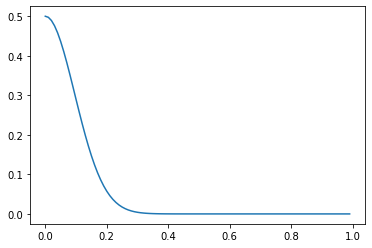

In [3]:


def integrand(w, t):
    return J(w)* (np.sin(w*t/2))**2 / (w**2)  / np.tanh (beta*w /2 )


def expint(t):
    return quad(integrand, 0, np.inf, args=(t))[0]


def rho_01(t):
    return np.exp(-4.0/np.pi * expint(t) ) * rho_01_init

vecfunc = np.vectorize(rho_01)
t1 = np.arange(0.0, 1.0, 0.01)
T1 = vecfunc(t1)
plt.plot (t1, T1)
plt.show()

Now we apply the reaccion coodinate mapping :

$  H_0= \frac{\omega}{2} \sigma_z +  \Omega_0 b ^{\dagger} b +g \sigma_z  \left( b + b ^{\dagger} \right) + \frac{g^2}{\Omega} \sigma_z^2 + \Omega \Delta_{RC} \left( b + b ^{\dagger} \right)^2$

$   H_B= \sum_{k} \Omega_k b_k ^{\dagger} b_k $

$   H_I= \left( b + b ^{\dagger} \right) \sum_k h_k \left( b_k + b_k ^{\dagger} \right)$

where the energy of the RC and the coupling strength become:

$\Omega_{0}^{2}=\frac{\left(\delta^{2}+\epsilon^{2}\right)^{2}}{5 \delta^{2}+\epsilon^{2}}, \quad g^{2}=\frac{\Gamma \delta^{4} \sqrt{5 \delta^{2}+\epsilon^{2}}}{64\left(\delta^{2}+\epsilon^{2}\right)^{2}}
$


The mapping transformation can be computed explicitly, where the transformed spectral density becomes ohmic:

$ J^{(1)}(\omega)=\frac{16 \omega \delta^{3} \sqrt{5 \delta^{2}+\epsilon^{2}}}{\omega^{4}+\omega^{2}\left(6 \delta^{2}-2 \epsilon^{2}\right)+\left(5 \delta^{2}+\epsilon^{2}\right)^{2}} $


And the renormalization energy as $\Delta_{RC}$: 

$\Omega_{0} \cdot \Delta_{RC} \equiv \sum_{k} \frac{h_{k}^{2}}{\Omega_{k}}=\frac{1}{2 \pi} \int_{0}^{\infty} \frac{J^{(1)}(\omega)}{\omega} d \omega$



1.6666666666666667


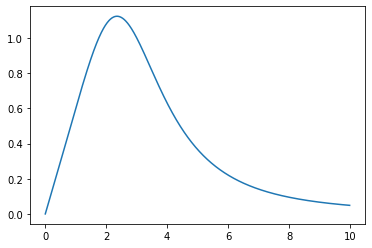

1.6666666666666667 4.330127018922194 0.2


In [4]:
##We build the supersystem Hamiltonian with N_RC number of modes for the RC

N_RC = 20 # number of basis states to consider
b = destroy(N_RC)

Omega_Rc=np.sqrt( (delta**2+ epsilon**2 )**2/(5*delta**2+ epsilon**2))
g=np.sqrt( (Gamma*delta**4*np.sqrt(5*delta**2+ epsilon**2))/(64*(delta**2+epsilon**2)**2)  )
print(Omega_Rc)

def J_1(w):
    return (16*w*delta**3*np.sqrt(5*delta**2+ epsilon**2))/(w**4+w**2*(6*delta**2-2*epsilon**2)+ (5*delta**2+epsilon**2)**2)

vecfunc = np.vectorize(J_1)
w = np.arange(0.0, 10.0, 0.01)
T = vecfunc(w)
plt.plot (w, T)
plt.show()

def integrand(w):
    return  J_1(w)/w

Delta_Rc = (1/(2*np.pi*Omega_Rc))* quad(integrand, 0, np.inf)[0]
Delta_Rc2=0
print(Omega_Rc,g,Delta_Rc)

H0= omega/2 *tensor(sigmaz(), identity(N_RC) )  + Omega_Rc *tensor(identity(2) , b.dag() * b )  # + g* tensor(sigmaz(),  b.dag() + b ) #+ Omega_Rc*Delta_Rc2 *tensor(identity(2) , (b.dag() + b)*(b.dag() + b) )  



In order to aplly the master equation we need to preapre the initial state as: 

$\rho_{0}=\rho_{S}^{0} \otimes \frac{e^{-\beta \Omega\left[b^{\dagger} b\right]}}{Z_{R C}}$

In [5]:
##Rc inicial state Thermal  


H1 = b.dag() * b
H2 = Delta_Rc2*(b.dag()+ b)*(b.dag()+ b)  ##Auxliar Hamiltonians
H_Rc= -beta*Omega_Rc*(H1+H2)
Exp= H_Rc.expm()
Z_Rc=Exp.tr()
rho_Rc_init=Exp/Z_Rc

#print(rho_Rc_init)

#Sistem inital state
psi0 = (1/np.sqrt(2.)) * (basis(2, 0) + basis(2, 1) )
#psi0 =  basis(2, 0) 

##Spin Inicial state 
rho_Spin= psi0*psi0.dag()
#print(rho_Spin)

###Tensor producto of the initial state
rho_init=tensor(rho_Spin,rho_Rc_init) 

print(rho_init.ptrace(0))

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[0.5 0.5]
 [0.5 0.5]]


The evolutions is given by the master equation (in the interaction picture):

$\dot{\boldsymbol{\rho}}_{0}(t)=\gamma' \left(b \boldsymbol{\rho}_{0}(t) b^{\dagger}-\frac{1}{2}\left\{b^{\dagger} b, \boldsymbol{\rho}_{0}(t)\right\}\right)+\bar{\gamma}' \left(b^{\dagger} \boldsymbol{\rho}_{0}(t) b-\frac{1}{2}\left\{b b^{\dagger}, \boldsymbol{\rho}_{0}(t)\right\}\right)-\mathrm{i}\left[\frac{\sigma}{2} b^{\dagger} b+\frac{\bar{\sigma}}{2} b b^{\dagger}, \boldsymbol{\rho}_{0}(t)\right]$


where $\gamma'=J(\Omega)\left[1+n_{B}(\Omega)\right]$ , $ \bar{\gamma}' = J(\Omega) n_{B}(\Omega)$ and $n_{B}(\omega)=\left[e^{\beta \omega}-1\right]^{-1}$

and 
$\sigma =\sigma(\Omega)=\frac{\mathrm{i}}{\pi} \mathcal{P} \int_{-\infty}^{+\infty} \frac{\gamma(\Omega')}{\Omega-\Omega'} d \Omega'$

In [6]:
def nb(w):
    return 1/(np.exp(beta*w)-1)

def gamma_prime(w):
    if w==0:
        return 0.592592
    else:
        return J_1(w)*(1+nb(w))

gamma_prime_n= J_1(Omega_Rc)*(1+nb(Omega_Rc))
gamma_bar_prime_n= J_1(Omega_Rc)*nb(Omega_Rc)
gamma_0=J_1(0.000000001)*(1+nb(0.000000001))

print(gamma_prime_n,gamma_bar_prime_n , gamma_prime(Omega_Rc), gamma_0)
print(gamma_prime(0.0))

1.186002113574108 0.22400686416793208 1.186002113574108 0.5925925441538583
0.592592


In [7]:
#from sympy import oo
#from sympy.integrals.integrals import Integral
#from sympy.abc import x

#Calculate the lamb Shift 
#Integral(gamma_prime(x)/(Omega_Rc-x), (x, -oo, oo)).principal_value()

aux1= gamma_prime_n/2.0 * tensor(identity(2) ,   b.dag()*b)
aux2= gamma_bar_prime_n/2.0 * tensor(identity(2) ,  b * b.dag())
aux3= g/Omega_Rc* ( gamma_prime_n/2.0 + gamma_bar_prime_n/2.0)*tensor(sigmaz() ,  b )
aux4= g/Omega_Rc* ( gamma_prime_n/2.0 + gamma_bar_prime_n/2.0)*tensor(sigmaz() ,  b.dag() )

Lamb=aux1+aux2+aux3+aux4

The decays follow the matrix 

$h= \left(\begin{array}{ccc}\gamma & 0 & \frac{g \gamma}{\Omega} \\ 0 & \bar{\gamma} & \frac{g \bar{\gamma}}{\Omega} \\ \frac{g \gamma}{\Omega} & \frac{g \bar{\gamma}}{\Omega} & \frac{g^{2}(\bar{\gamma}+\gamma)}{\Omega^{2}}\end{array}\right)$

We define the new Limbland opetaros and decays as :

$u^{\dagger} h u=\left[\begin{array}{cccc}\gamma_{1} & 0 & \cdots & 0 \\ 0 & \gamma_{2} & \cdots & 0 \\ \vdots & \vdots & \ddots & \vdots \\ 0 & 0 & \cdots & \gamma_{N^{2}}\end{array}\right]$

and: 
$L_{i}=\sum_{j=1}^{N^{2}-1} u_{j i} A_{j}$ i.e $L = U ^{-1} A$ and the vector $A=( b, b ^{\dagger} , \sigma_z)$

In [8]:
# import sympy 
#M = Matrix([[gamma_prime_n, 0, gamma_prime_n*g/Omega_Rc], [0, gamma_bar_prime_n, g*gamma_bar_prime_n/Omega_Rc], [g*gamma_prime_n/Omega_Rc, g*gamma_bar_prime_n/Omega_Rc, g**2*(gamma_prime_n+gamma_bar_prime_n)/Omega_Rc**2]]) 

#test=np.array([[1., 2.], [3., 4.]])
MP = np.array([[gamma_prime_n, 0, gamma_prime_n*g/Omega_Rc], [0, gamma_bar_prime_n, g*gamma_bar_prime_n/Omega_Rc], [g*gamma_prime_n/Omega_Rc, g*gamma_bar_prime_n/Omega_Rc, g**2*(gamma_prime_n+gamma_bar_prime_n)/Omega_Rc**2]])

#w, v = LA.eig(test)
#print(w)
#print(v)

print(MP)

w, v = LA.eig(MP)
print(w)
#print(v)

U=np.array([[0.31174005, -0.68228824,  0.6612873 ],[0.0534015,-0.68228824,-0.72913033],[0.9486656,0.26261287,-0.17626135]])

U_1=LA.inv(U)

print(U)
print(U_1)


[[1.18600211 0.         3.08132388]
 [0.         0.22400686 0.5819869 ]
 [3.08132388 0.5819869  9.5175606 ]]
[ 1.05628721e+01 -2.92149885e-16  3.64697487e-01]
[[ 0.31174005 -0.68228824  0.6612873 ]
 [ 0.0534015  -0.68228824 -0.72913033]
 [ 0.9486656   0.26261287 -0.17626135]]
[[ 0.31174006  0.05340151  0.9486656 ]
 [-0.68228824 -0.68228824  0.26261286]
 [ 0.6612873  -0.72913033 -0.17626135]]


In [9]:
A1=tensor(identity(2) ,  b )
A2=tensor(identity(2) , b.dag()  )
A3=tensor( sigmaz(), identity(N_RC)  )

print(w[1])
L1=U[0][0]*A1+U[1][0]*A2+U[2][0]*A3
L2=U[0][1]*A1+U[1][1]*A2+U[2][1]*A3
L3=U[0][2]*A1+U[1][2]*A2+U[2][2]*A3

gamma1=w[0]
gamma2=0.0 #w[1]
gamma3=w[2]

L=[np.sqrt(gamma1) * L1, np.sqrt(gamma2)*L2,  np.sqrt(gamma3)*L3]

L0=[np.sqrt(gamma_prime_n) * (A1), np.sqrt(gamma_bar_prime_n)*(A2)  ]

-2.921498845353455e-16


We find the the coherences as:

$\left|\rho_{01}\right|=\mid \frac{1}{2} \operatorname{Tr}\left\{\left(\sigma^{x}+\mathrm{i} \sigma^{y}\right) \rho(t)\right\}$

In [10]:
t0 = 0.0
tf = 1.0
time_steps = 500
dt= (tf-t0)/time_steps
#Hlamb=-g**2/Omega_Rc * (tensor(identity(2) ,  b.dag()*b )  + tensor(identity(2) ,  b*b.dag() ) )
Hg=g* tensor(sigmaz(),  b.dag() + b )
## Time range
t3 = np.linspace(0, tf, time_steps)

result = mesolve(Hg , rho_init, t3, L0)
#result = mesolve( 0*H0, rho_init, t3, L0)


states_IP=result.states
exp_result=[0 for i in range(len(states_IP))]

trace=[0 for i in range(len(states_IP))]

for i in range(len(states_IP)):
    exp_result[i]=  (-1j*H0*t3[i]).expm()* states_IP[i]*  (1j*H0*t3[i]).expm()
    #trace[i]=  states_IP[i].ptrace(0)
    trace[i]=  exp_result[i].ptrace(0)

print(trace[0])    


p01=[0 for i in range(len(states_IP))]
for i in range(len(states_IP)):
    p01[i]=abs(expect(0.5*(sigmax()+1j*sigmay()),trace[i]))

print(dt)  

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[0.5 0.5]
 [0.5 0.5]]
0.002


Now we evolve with the following equation in order to compare: 

$\begin{aligned} \dot{\rho}=-& \mathrm{i}\left[H_{S}^{\prime}, \rho\right]-\int_{0}^{\infty} C(+\tau)\left[\left(b+b^{\dagger}\right), e^{-\mathrm{i} H_{S}^{\prime} \tau}\left(b+b^{\dagger}\right) e^{+\mathrm{i} H_{S}^{\prime} \tau} \rho(t)\right] d \tau \\ &-\int_{0}^{\infty} C(-\tau)\left[\rho(t) e^{-\mathrm{i} H_{S}^{\prime} \tau}\left(b+b^{\dagger}\right) e^{+i H_{S}^{\prime} \tau},\left(b+b^{\dagger}\right)\right] d \tau \end{aligned}$

where we need to find the supersystem Hamitionial states $H_{S}^{\prime}\left|a^{\prime}\right\rangle=E_{a}^{\prime}\left|a^{\prime}\right\rangle$, we can find:  

$\int_{0}^{\infty} C(\tau) e^{-\mathrm{i} H_{S}^{\prime} \tau}\left(b+b^{\dagger}\right) e^{+\mathrm{i} H_{S}^{\prime} \tau} d \tau=\sum_{a b}\left\langle a^{\prime}\left|\left(b+b^{\dagger}\right)\right| b^{\prime}\right\rangle \int_{0}^{\infty} C(\tau) e^{-\mathrm{i}\left(E_{a}^{\prime}-E_{b}^{\prime}\right) \tau} d \tau\left|a^{\prime}\right\rangle\left\langle b^{\prime}\right|$

where: 

$\int_{0}^{\infty} C(\tau) e^{+\mathrm{i}\left(E_{b}^{\prime}-E_{a}^{\prime}\right) \tau} d \tau =\frac{\gamma\left(E_{b}^{\prime}-E_{a}^{\prime}\right)}{2}+\frac{\mathrm{i}}{2 \pi} \mathcal{P} \int \frac{\gamma(\omega)}{E_{b}^{\prime}-E_{a}^{\prime}-\omega} d \omega$ 

where we will negecled the principal value term (lamb Shift) and $\gamma(\omega)=J(\omega)\left[1+n_{B}(\omega)\right]$

In [11]:
def nb(w):
    return 1/(np.exp(beta*w)-1)

def gamma(w):
    if (w==0):
        return 0.592592
    else:  
        return J_1(w)*(1+nb(w))

  
  

all_energy, all_state = H0.eigenstates(sparse=sparse)

Nmax=N_RC*2
Limb_op1=0
Limb_op2=0
Apre = spre((b + b.dag()))
Apost = spost(b + b.dag())
for j in range(Nmax):
    for k in range(Nmax):
        A = (b + b.dag()).matrix_element(all_state[j].dag(), all_state[k])
        delE = (all_energy[j] - all_energy[k])
        X1=gamma(delE)/2
        X2=gamma(-delE)/2
        Limb_op1 = Limb_op1 + A*X1*all_state[j] * all_state[k].dag() 
        Limb_op2 = Limb_op2 + A*X2*all_state[j] * all_state[k].dag()
B=tensor(identity(2),b+ b.dag())
print(B*Limb_op1)


t0 = 0.0
tf = 1.0
time_steps = 500


L2= -spre(B* Limb_op1)+ sprepost(Limb_op1, B)-  spost(Limb_op2*B) +  sprepost( B, Limb_op2)
## Time range
t = np.linspace(0, tf, time_steps)


psi0 =  basis(2, 0)  
rho_Spin= psi0*psi0.dag()
rho_init_2=tensor(rho_Spin,rho_Rc_init)

output_2 = mesolve(H0, rho_init, t, [L2])

Quantum object: dims = [[2, 20], [2, 20]], shape = (40, 40), type = oper, isherm = False
Qobj data =
[[0.59300106 0.         0.15839677 ... 0.         0.         0.        ]
 [0.         1.29800555 0.         ... 0.         0.         0.        ]
 [0.83863014 0.         2.00301003 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


In [12]:
states_IP_2=output_2.states


trace_2=[0 for i in range(len(states_IP_2))]
for i in range(len(states_IP_2)):
    trace_2[i]=  states_IP_2[i].ptrace(0)

print(trace_2[0])    


p01_2=[0 for i in range(len(states_IP_2))]
for i in range(len(states_IP_2)):
    p01_2[i]=abs(expect(0.5*(sigmax()+1j*sigmay()),trace_2[i]))
    
print(p01_2[0])

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[0.5 0.5]
 [0.5 0.5]]
0.4999999999999998


In [13]:
rho_RC=[0 for i in range(len(states_IP_2))]


for i in range(len(states_IP_2)):
    rho_RC[i]=  exp_result[i].ptrace(1)

print(rho_RC[0])  

Quantum object: dims = [[20], [20]], shape = (20, 20), type = oper, isherm = True
Qobj data =
[[8.11124397e-01 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 1.53201609e-01 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 2.89360463e-02 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00

In [14]:
n=[0 for i in range(len(states_IP_2))]
for i in range(len(states_IP_2)):
    n[i]=expect(b.dag()*b,rho_RC[i])
    

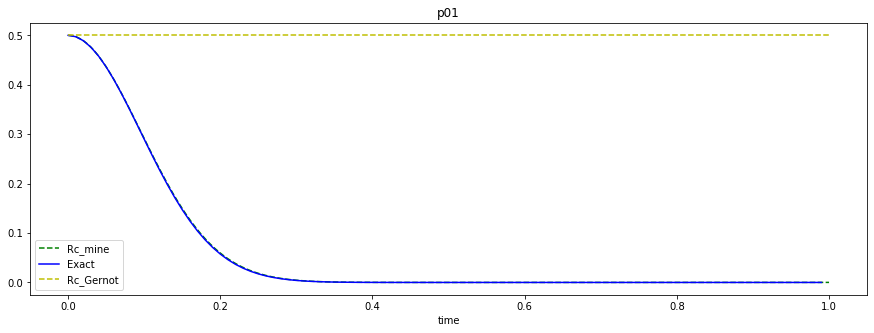

In [16]:
plt.title("p01")
plt.rcParams['figure.figsize'] = [15,5]
plt.plot(t3,p01,"--",label='Rc_mine', color = "g")
plt.plot (t1 , T1,"-",label='Exact', color = "b") ###if scaled with 1.25 they are the same
plt.plot(t,p01_2,"--",label='Rc_Gernot', color = "y")
#plt.plot(tlist, result.expect[0])
plt.xlabel("time")
plt.legend()
plt.show()

Energy
$\langle E\rangle (t) = \langle E\rangle_{0}+\frac{2}{\pi} \int_{0}^{\infty} \frac{\Gamma(\omega)}{\omega} \sin ^{2}\left(\frac{\omega t}{2}\right) d \omega$



/home/luis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  if __name__ == '__main__':


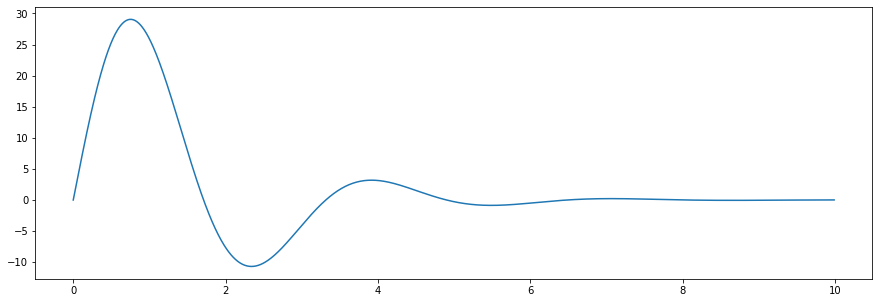

In [56]:
def integrand_en(w, t):
    return J(w)* (np.sin(w*t/2))**2 / w *2/np.pi

def integrand_en_1(w, t):
    return J(w)* np.sin(w*t/2) * np.cos(w*t/2)*2/np.pi 


def expint_en(t):
    return quad(integrand_en_1, 0, np.inf, args=(t))[0]


def energy_sol(t):
    return  expint_en(t) 

def energy_sol_der(t):
    return derivative(energy_sol, t)

vecfunc = np.vectorize(energy_sol)
ten = np.arange(0.0, 10.0, 0.01)
Ten = vecfunc(ten)
plt.plot (ten, Ten)
plt.show()

In [57]:
energy=[0 for i in range(len(states_IP))]
for i in range(len(states_IP)):
    energy[i]=-expect( g* tensor(sigmaz(),  b.dag() + b ) ,exp_result[i])
    
denergy=[0 for i in range(len(states_IP))] 

for i in range(len(states_IP)-1):
    denergy[i]=(energy[i+1]-energy[i])/dt

In [58]:
energy_g=[0 for i in range(len(states_IP))]
for i in range(len(states_IP)):
    energy_g[i]=-expect( g* tensor(sigmaz(),  b.dag() + b ) ,states_IP_2[i])
    
denergy_g=[0 for i in range(len(states_IP))] 

for i in range(len(states_IP)-1):
    denergy_g[i]=(energy[i+1]-energy[i])/dt

/home/luis/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/luis/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


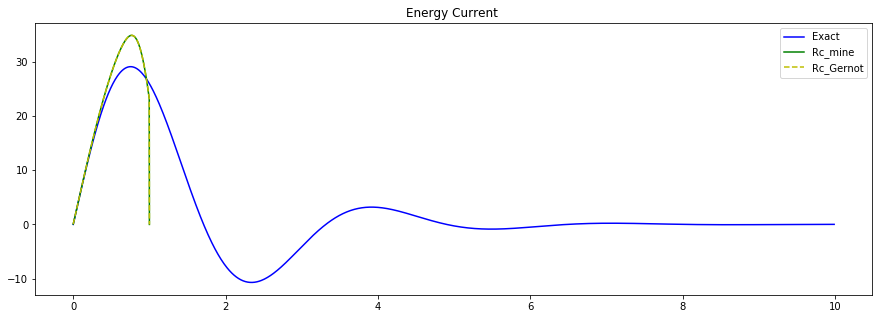

In [59]:
plt.title("Energy Current ")
plt.rcParams['figure.figsize'] = [15,5]
plt.plot (ten, Ten,"-",label='Exact', color = "b")
plt.plot(t3,denergy,"-",label='Rc_mine', color = "g")
plt.plot(t3,denergy_g,"--",label='Rc_Gernot', color = "y")
plt.legend()
plt.show()

# 


In [57]:

import matplotlib.pyplot as plt
import numpy as np
import sys
sys.path.insert(1,'../../')
import q_trajectories as qtr


In [62]:

t0 = 0.
tf = 1.0
time_steps = 1000
dt = int(abs(tf-t0)/time_steps)

## Time range
t = np.linspace(t0, tf, np.int32(time_steps))

## Initial state 

#psi0 = np.array([1,0], dtype = np.complex128)
#rho0 = np.array([[0.5,0.2],[0.1,0.5]], dtype = np.complex128, order='C')
rho0=rho_init.full()

aux2=Hlamb.full()

aux=H0.full()

## Hamiltonian
def H(t):
    return aux2+aux

## Lindblad operators
def L(t):
    return [L0[0].full(), L0[1].full()]

## feedback test


## Unraveling
### This matrix must follow the conditions stated on Diosí's paper: |u| <= 1
u_matrix =np.eye(len(L(0)))

print(H(0))
print(u_matrix)


aux11=expect(tensor(identity(2) , b.dag() * b.dag() ) , rho_init)- ( expect(tensor(identity(2) , b.dag() ), rho_init) * expect(tensor(identity(2) , b.dag() ) , rho_init) )
aux22=expect(tensor(identity(2) , b * b ) , rho_init)- ( expect(tensor(identity(2) , b ), rho_init) * expect(tensor(identity(2) , b ) , rho_init) )

print(aux11, aux22)
#c1=aux11/(abs(aux11))


[[  11.75      +0.j    4.33012702+0.j    0.        +0.j ...
     0.        +0.j    0.        +0.j    0.        +0.j]
 [   4.33012702+0.j   13.41666667+0.j    6.12372436+0.j ...
     0.        +0.j    0.        +0.j    0.        +0.j]
 [   0.        +0.j    6.12372436+0.j   15.08333333+0.j ...
     0.        +0.j    0.        +0.j    0.        +0.j]
 ...
 [   0.        +0.j    0.        +0.j    0.        +0.j ...
    39.08333333+0.j  -18.37117307+0.j    0.        +0.j]
 [   0.        +0.j    0.        +0.j    0.        +0.j ...
   -18.37117307+0.j   40.75      +0.j  -18.87458609+0.j]
 [   0.        +0.j    0.        +0.j    0.        +0.j ...
     0.        +0.j  -18.87458609+0.j -182.58333333+0.j]]
[[1. 0.]
 [0. 1.]]
0j 0j


In [63]:
test = qtr.System(H, rho0, t, lindbladList = L, uMatrix = u_matrix)

In [64]:
ind_traj_psi = test.diffusiveRhoTrajectory(10)


In [65]:
#ensemble_rho = test.diffusiveRhoEnsemble(100)
rho_diff = test.diffusiveRhoAverage(n_trajectories = 1,  traj_type='density_matrix')

In [66]:
print(rho_diff[0].shape)
print(rho_diff[1])

(40, 40)
[[4.05562199e-01+0.j         8.18922468e-03+0.00142587j
  0.00000000e+00+0.j         ... 0.00000000e+00+0.j
  0.00000000e+00+0.j         0.00000000e+00+0.j        ]
 [8.18922468e-03-0.00142587j 7.66008047e-02+0.j
  2.18742740e-03+0.00038086j ... 0.00000000e+00+0.j
  0.00000000e+00+0.j         0.00000000e+00+0.j        ]
 [0.00000000e+00+0.j         2.18742740e-03-0.00038086j
  1.44680232e-02+0.j         ... 0.00000000e+00+0.j
  0.00000000e+00+0.j         0.00000000e+00+0.j        ]
 ...
 [0.00000000e+00+0.j         0.00000000e+00+0.j
  0.00000000e+00+0.j         ... 4.05523517e-15+0.j
  0.00000000e+00+0.j         0.00000000e+00+0.j        ]
 [0.00000000e+00+0.j         0.00000000e+00+0.j
  0.00000000e+00+0.j         ... 0.00000000e+00+0.j
  0.00000000e+00+0.j         0.00000000e+00+0.j        ]
 [0.00000000e+00+0.j         0.00000000e+00+0.j
  0.00000000e+00+0.j         ... 0.00000000e+00+0.j
  0.00000000e+00+0.j         0.00000000e+00+0.j        ]]


In [67]:
for i in range(len(rho_diff)):
    rho_diff[i]=Qobj(rho_diff[i], dims= [[2, 20], [2, 20]])
    
    
print(rho_diff[0])        

Quantum object: dims = [[2, 20], [2, 20]], shape = (40, 40), type = oper, isherm = True
Qobj data =
[[0.4055622  0.         0.         ... 0.         0.         0.        ]
 [0.         0.0766008  0.         ... 0.         0.         0.        ]
 [0.         0.         0.01446802 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


In [68]:
exp_result_QT=[0 for i in range(len(rho_diff))]

trace_QT=[0 for i in range(len(rho_diff))]

for i in range(len(rho_diff)):
    exp_result_QT[i]=  (-1j*H0*t[i]).expm()* rho_diff[i]*  (1j*H0*t[i]).expm()
    trace_QT[i]=  rho_diff[i].ptrace(0)
    #trace_QT[i]=  exp_result_QT[i].ptrace(0)

print(trace_QT[0])    


p01_QT=[0 for i in range(len(rho_diff))]
for i in range(len(rho_diff)):
    p01_QT[i]=abs(expect(0.5*(sigmax()+1j*sigmay()),trace_QT[i]))

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[0.5 0.5]
 [0.5 0.5]]


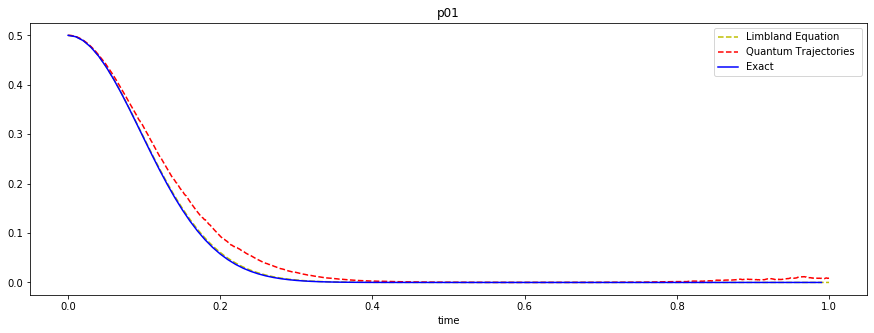

In [70]:
plt.title("p01")
plt.rcParams['figure.figsize'] = [15,5]
plt.plot(t3,p01,"--",label='Limbland Equation', color = "y")
plt.plot(t,p01_QT,"--",label='Quantum Trajectories ', color = "r")
plt.plot (t1 , T1,"-",label='Exact', color = "b") 
plt.xlabel("time")
#plt.xlim([0.0, 0.4])
#plt.ylim([0.0, 0.5])
plt.legend()
plt.show()

In [25]:
##Rc dynamics 
rho_RC_QT=[0 for i in range(len(rho_diff))]


for i in range(len(rho_diff)):
    rho_RC_QT[i]=  exp_result_QT[i].ptrace(1)

print(rho_RC_QT[0])   

Quantum object: dims = [[20], [20]], shape = (20, 20), type = oper, isherm = True
Qobj data =
[[8.11124397e-01 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 1.53201609e-01 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 2.89360463e-02 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00

In [26]:
n_QT=[0 for i in range(len(rho_diff))]
n_sigma=[0 for i in range(len(rho_diff))]
plot=[0 for i in range(len(rho_diff))]
for i in range(len(rho_diff)):
    n_QT[i]=expect(b.dag()*b,rho_RC_QT[i])
    n_sigma[i]=expect(b.dag()*b*b.dag()*b,rho_RC_QT[i])- expect(b.dag()*b,rho_RC_QT[i])**2
    plot[i]=n_QT[i]+np.sqrt(n_sigma[i])


/home/luis/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/luis/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


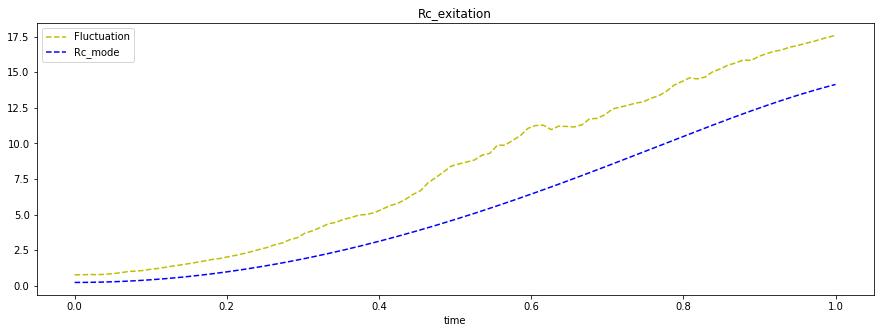

In [27]:
plt.title("Rc_exitation")
plt.rcParams['figure.figsize'] = [15,5]
#plt.plot(t,n_QT,"--",label='Rc_mode_QT', color = "g")
plt.plot(t,plot,"--",label='Fluctuation', color = "y")
plt.plot(t3,n,"--",label='Rc_mode', color = "b")
plt.xlabel("time")
plt.legend()
plt.show()